# Foreign Exchange Rate Prediction using LSTM Recurrent Neural Network

In [1]:
#Importing Linraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import math
import yfinance as yf
import numpy as np
import pandas as pd
import pywt
from pywt import wavedec
from pywt import waverec
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#Reading dataset
data_set = pd.read_csv('sample_data/Foreign_Exchange_Rates.csv', na_values='ND')
data_set_plot = pd.read_csv('sample_data/Foreign_Exchange_Rates.csv', na_values='ND')

In [3]:
data_set.shape

(5217, 24)

In [4]:
#Dataset head
data_set.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [5]:
#Checking null values
data_set.isnull().sum()

Unnamed: 0                                     0
Time Serie                                     0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            198
EURO AREA - EURO/US$                         198
NEW ZEALAND - NEW ZELAND DOLLAR/US$          198
UNITED KINGDOM - UNITED KINGDOM POUND/US$    198
BRAZIL - REAL/US$                            198
CANADA - CANADIAN DOLLAR/US$                 198
CHINA - YUAN/US$                             197
HONG KONG - HONG KONG DOLLAR/US$             198
INDIA - INDIAN RUPEE/US$                     199
KOREA - WON/US$                              198
MEXICO - MEXICAN PESO/US$                    198
SOUTH AFRICA - RAND/US$                      198
SINGAPORE - SINGAPORE DOLLAR/US$             198
DENMARK - DANISH KRONE/US$                   198
JAPAN - YEN/US$                              198
MALAYSIA - RINGGIT/US$                       198
NORWAY - NORWEGIAN KRONE/US$                 198
SWEDEN - KRONA/US$                           198
SRI LANKA - SRI LANK

In [6]:
data_set.interpolate(inplace=True)
data_set.isnull().sum()

Unnamed: 0                                   0
Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND -

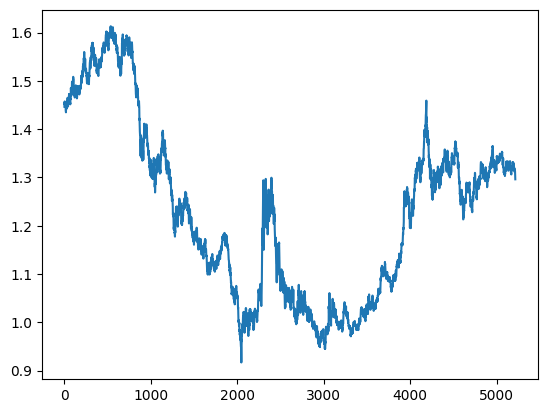

In [7]:
#Plotting China Exchange rate
plt.plot(data_set['CANADA - CANADIAN DOLLAR/US$'])

In [8]:
#Data frame
df = data_set['CANADA - CANADIAN DOLLAR/US$']

In [9]:
print(df)

0       1.4465
1       1.4518
2       1.4518
3       1.4571
4       1.4505
         ...  
5212    1.3142
5213    1.3124
5214    1.3073
5215    1.3058
5216    1.2962
Name: CANADA - CANADIAN DOLLAR/US$, Length: 5217, dtype: float64


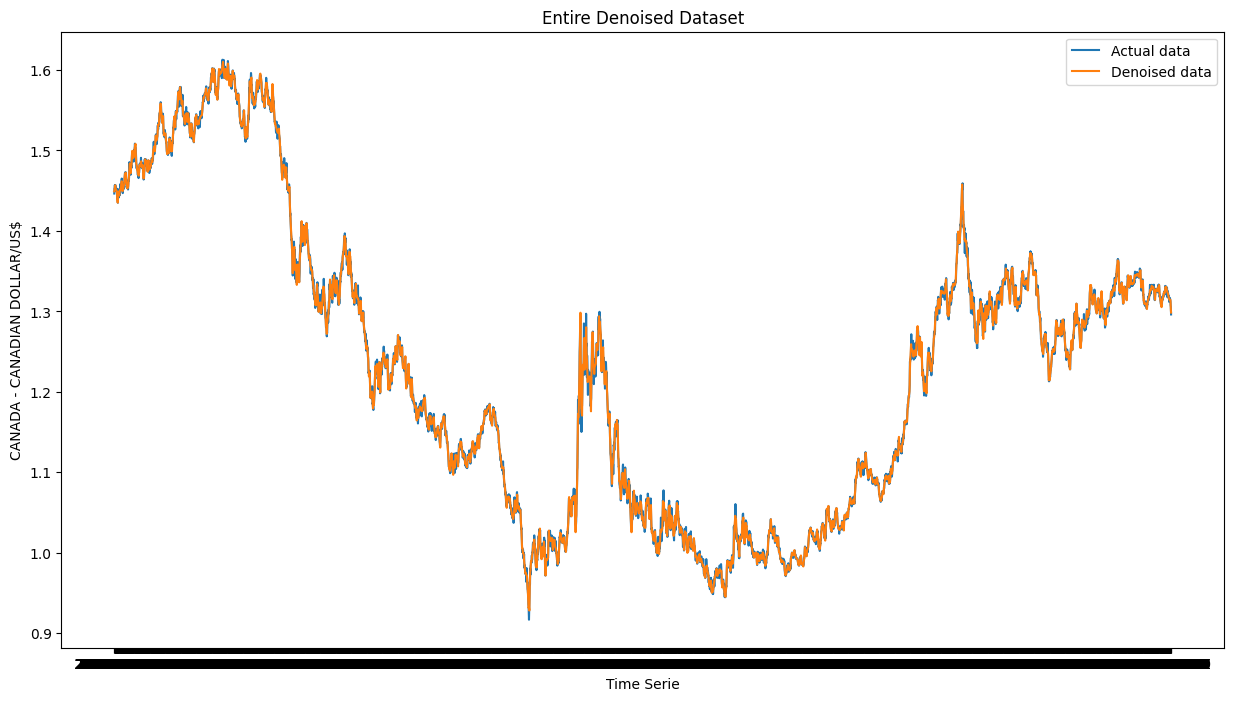

In [10]:
def denoise_preprocess(fx_data):

#taking closing price data
    combined_data = fx_data['Time Serie'] + fx_data['CANADA - CANADIAN DOLLAR/US$'].astype(str)

    # Create a new DataFrame from the combined_data Series
    formatted_df = pd.DataFrame(combined_data)

    # Split the combined data into two separate columns 'Date' and 'Price'
    formatted_df[['Date', 'Price']] = formatted_df[0].str.extract(r'(\d{4}-\d{2}-\d{2})(.*)')

    # Convert 'Date' to datetime and 'Price' to a numeric type (float)
    formatted_df['Date'] = pd.to_datetime(formatted_df['Date'])
    formatted_df['Price'] = pd.to_numeric(formatted_df['Price'], errors='coerce')  # 'coerce' will set 'nan' strings to NaN

    # Set 'Date' as the index of the DataFrame
    formatted_df.set_index('Date', inplace=True)

    return formatted_df['Price']

def wavelet_denoise(fx_data,train):
        #initiate wavelet type and wavelet decomposition level variables
    level = 2 #wavelet transform decomposition level
    wavelet = 'db2' #wavelet type. here we choose wavelet Daubechies 2 (db2)
    #making function for calculating mean absolute deviation for thresholding
    def mad(d, axis=None):
        """ Mean absolute deviation of a signal """
        return np.mean(np.absolute(d - np.mean(d, axis)), axis)

    #decompositon/Discrete Wavelet Transform
    level = int(level)
    wavelet = wavelet
    coeff = wavedec(train, wavelet, level=level)
    level, wavelet, coeff
    #thresholding
    sigma = mad(coeff[-level])/0.6745
    threshold = sigma * np.sqrt(2*np.log(len(train)))
    coeff[1:] = (pywt.threshold(i, value=threshold, mode="soft") for i in coeff[1:])
    #reconstruction/Inverse Discrete Wavelet Transform
    denoised = waverec(coeff, wavelet)
    train = train.reset_index()
    if len(train)!=len(denoised):
        denoised = denoised[:-1]
    train ['denoised'] = denoised
    fx_data['denoised'] = denoised
    return train

def plot_before_after_denoise(original, denoised):
    #plotting the actual stock price data and the denoised data
    plt.figure(figsize=(15, 8))
    plt.title('Entire Denoised Dataset')
    plt.plot(original['Time Serie'], original['CANADA - CANADIAN DOLLAR/US$'])
    plt.plot(original['Time Serie'], denoised)
    plt.xlabel('Time Serie')
    plt.ylabel('CANADA - CANADIAN DOLLAR/US$')
    plt.legend(['Actual data', 'Denoised data'], loc='best')
denoised = wavelet_denoise(data_set, denoise_preprocess(data_set))
plot_before_after_denoise(data_set, denoised['denoised'])

In [11]:
data_set.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,denoised
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,1.449221
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,1.449460
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,1.452052
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,1.454014
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,1.455345


In [12]:
denoised.head()

,Date,Price,denoised
0,2000-01-03,1.4465,1.449221
1,2000-01-04,1.4518,1.449460
2,2000-01-05,1.4518,1.452052
3,2000-01-06,1.4571,1.454014
4,2000-01-07,1.4505,1.455345


In [13]:
#Preprocessing data set
df = np.array(df).reshape(-1,1)

In [14]:
df

array([[1.4465],
       [1.4518],
       [1.4518],
       ...,
       [1.3073],
       [1.3058],
       [1.2962]])

In [15]:
df_dn = np.array(denoised['denoised']).reshape(-1,1)
df_dn

array([[1.44922147],
       [1.44945974],
       [1.45205248],
       ...,
       [1.30712994],
       [1.3019178 ],
       [1.29856927]])

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_dn = MinMaxScaler()

In [17]:
df = scaler.fit_transform(df)
df_dn = scaler_dn.fit_transform(df_dn)

In [18]:
df

array([[0.76106322],
       [0.76867816],
       [0.76867816],
       ...,
       [0.56106322],
       [0.55890805],
       [0.54511494]])

In [19]:
df_dn

array([[0.76402938],
       [0.7643788 ],
       [0.76818099],
       ...,
       [0.55565536],
       [0.54801188],
       [0.54310134]])

In [20]:
#Training and test sets
train = df[:4800]
test = df[4800:]
train_dn = df_dn[:4800]
test_dn = df_dn[4800:]

print(train.shape)
print(test.shape)
print(train_dn.shape)
print(test_dn.shape)

(4800, 1)
(417, 1)
(4800, 1)
(417, 1)


In [21]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [22]:
look_back = 1

x_train , y_train = get_data(train, look_back)
x_train_dn , y_train_dn = get_data(train_dn, look_back)
print(x_train.shape)
print(y_train.shape)
print(x_train_dn.shape)
print(y_train_dn.shape)

(4798, 1)
(4798,)
(4798, 1)
(4798,)


In [23]:
x_test , y_test = get_data(test,look_back)
x_test_dn , y_test_dn = get_data(test_dn,look_back)
print(x_test.shape)
print(y_test.shape)
print(x_test_dn.shape)
print(y_test_dn.shape)

(415, 1)
(415,)
(415, 1)
(415,)


In [24]:
#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)
x_train_dn = x_train_dn.reshape(x_train_dn.shape[0],x_train_dn.shape[1], 1)
x_test_dn = x_test_dn.reshape(x_test_dn.shape[0],x_test_dn.shape[1], 1)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(x_train_dn.shape)
print(x_test_dn.shape)

(4798, 1, 1)
(415, 1, 1)
(4798, 1, 1)
(415, 1, 1)


In [26]:
#Defining the LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [27]:
n_features = x_train.shape[1]
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))
n_features_dn = x_train_dn.shape[1]
model_dn = Sequential()
model_dn.add(LSTM(100,activation='relu',input_shape=(1,1)))
model_dn.add(Dense(n_features_dn))

In [28]:
model.summary()
model_dn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                              

In [29]:
#Compiling
model.compile(optimizer='adam', loss = 'mse')
model_dn.compile(optimizer='adam', loss = 'mse')

In [30]:
#Training
model.fit(x_train,y_train, epochs = 5, batch_size=1)
model_dn.fit(x_train_dn,y_train_dn, epochs = 5, batch_size=1)

Epoch 1/5
4798/4798 [==============================] - 14s 2ms/step - loss: 0.0056
Epoch 2/5
4798/4798 [==============================] - 11s 2ms/step - loss: 1.3151e-04
Epoch 3/5
4798/4798 [==============================] - 11s 2ms/step - loss: 1.2785e-04
Epoch 4/5
4798/4798 [==============================] - 11s 2ms/step - loss: 1.2807e-04
Epoch 5/5
4798/4798 [==============================] - 11s 2ms/step - loss: 1.2936e-04
Epoch 1/5
4798/4798 [==============================] - 13s 2ms/step - loss: 0.0062
Epoch 2/5
4798/4798 [==============================] - 12s 2ms/step - loss: 6.2753e-05
Epoch 3/5
4798/4798 [==============================] - 12s 2ms/step - loss: 5.3851e-05
Epoch 4/5
4798/4798 [==============================] - 11s 2ms/step - loss: 5.3992e-05
Epoch 5/5
4798/4798 [==============================] - 11s 2ms/step - loss: 5.4270e-05


In [31]:
#Prediction using the trained model
scaler.scale_
scaler_dn.scale_

array([1.4664774])

In [32]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])
y_pred_dn = model_dn.predict(x_test_dn)
y_pred_dn = scaler_dn.inverse_transform(y_pred_dn)
print(y_pred_dn[:10])

13/13 [==============================] - 0s 2ms/step
[[1.2941558]
 [1.2968354]
 [1.2788239]
 [1.291282 ]
 [1.2891396]
 [1.2866082]
 [1.2949839]
 [1.2851481]
 [1.2930354]
 [1.2899187]]
13/13 [==============================] - 0s 2ms/step
[[1.3001984]
 [1.3034097]
 [1.2990334]
 [1.2966902]
 [1.29638  ]
 [1.2955251]
 [1.2971259]
 [1.298069 ]
 [1.2983538]
 [1.2988149]]


In [33]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])
y_test_dn = np.array(y_test_dn).reshape(-1,1)
y_test_dn = scaler_dn.inverse_transform(y_test_dn)
print(y_test_dn[:10])

[[1.3027]
 [1.2842]
 [1.297 ]
 [1.2948]
 [1.2922]
 [1.3008]
 [1.2907]
 [1.2988]
 [1.2956]
 [1.298 ]]
[[1.30073409]
 [1.29637235]
 [1.29403691]
 [1.29372779]
 [1.29287571]
 [1.29447132]
 [1.29541108]
 [1.29569498]
 [1.29615462]
 [1.29862985]]


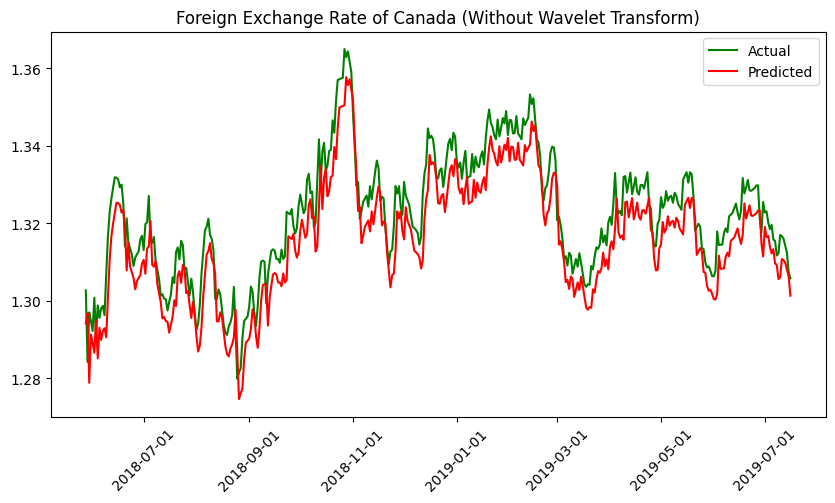

In [34]:
#Visualizing the results
date_range = pd.date_range(start=data_set_plot['Time Serie'][4800], periods=len(y_test), freq='D')

plt.figure(figsize=(10, 5))
plt.title('Foreign Exchange Rate of Canada (Without Wavelet Transform)')
plt.plot(date_range, y_test, label='Actual', color='g')
plt.plot(date_range, y_pred, label='Predicted', color='r')

# Rotate the dates on x-axis for better visibility
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.legend()
plt.show()

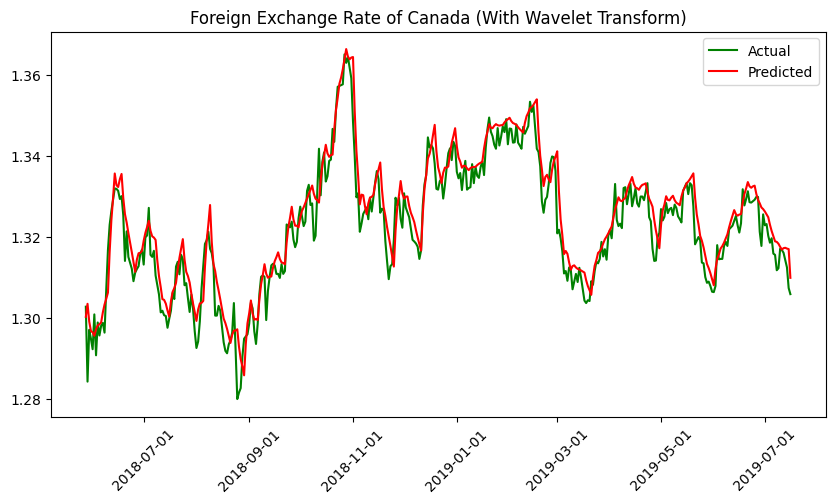

In [35]:
#Visualizing the results
date_range = pd.date_range(start=data_set_plot['Time Serie'][4800], periods=len(y_test), freq='D')

plt.figure(figsize=(10, 5))
plt.title('Foreign Exchange Rate of Canada (With Wavelet Transform)')
plt.plot(date_range, y_test, label='Actual', color='g')
plt.plot(date_range, y_pred_dn, label='Predicted', color='r')

# Rotate the dates on x-axis for better visibility
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
print("MSE for LSTM without Wavelet Transform:")
mse = mean_squared_error(y_test, y_pred)
print(mse)
variance_y = np.var(y_test)
relative_mse = mse / variance_y
print("Relative MSE for LSTM without Wavelet Transform:", relative_mse)


MSE for LSTM without Wavelet Transform:
5.980701870462418e-05
Relative MSE for LSTM without Wavelet Transform: 0.2477068888221327


In [37]:
print("MSE for LSTM with Wavelet Transform:")
mse_dn = mean_squared_error(y_test, y_pred_dn)
print(mse_dn)
variance_y = np.var(y_test)
relative_mse_dn = mse_dn / variance_y
print("Relative MSE for LSTM without Wavelet Transform:", relative_mse_dn)

MSE for LSTM with Wavelet Transform:
2.3531084607891723e-05
Relative MSE for LSTM without Wavelet Transform: 0.09746032965827403
